<a href="https://colab.research.google.com/github/rename-z/Deep-Learning/blob/master/Zero%20to%20GANs/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Classification using Logistic Regression in PyTorch**

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='/content', download=True)

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='/content', train=False)

In [5]:
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F3E0C0E7630>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label :  1


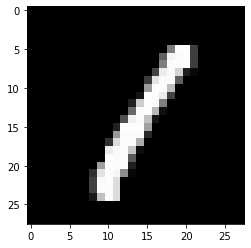

In [8]:
image, label = dataset[3]
plt.imshow(image, cmap='gray')
print('Label : ', label)

Label :  6


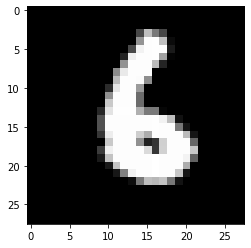

In [9]:
image, label = dataset[36]
plt.imshow(image, cmap='gray')
print('Label : ', label)

In [22]:
import torchvision.transforms as transform
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [11]:
dataset = MNIST(root='/content', transform=transform.ToTensor())

In [12]:
img_tensor, label = dataset[36]
img_tensor.shape, label

(torch.Size([1, 28, 28]), 6)

In [14]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.1686, 0.8980, 0.9922, 0.9922, 0.6078],
         [0.5686, 0.9922, 0.9922, 0.9922, 0.4196],
         [0.7882, 0.9922, 0.9922, 0.9922, 0.4196],
         [0.8902, 0.9961, 0.9961, 0.9961, 0.6902],
         [0.9922, 0.9922, 0.9922, 0.9922, 0.9922]]])
tensor(1.) tensor(0.)


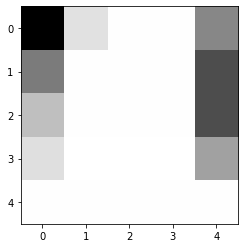

In [15]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [18]:
train_ds, val_ds = random_split(dataset, [50000, 10000])

In [20]:
len(train_ds)

50000

In [21]:
len(val_ds)

10000

In [23]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)